<img src="C:\Users\91835\OneDrive\Pictures\Screenshots\Screenshot 2024-06-14 084233.png" width=400px height=400px></img>

# Handling duplicate data

### Reasons to have duplicate data
* combine datasets from multiple places
* Scrape data (Collect Data through Web Scraping)
* Receive data from clients/other departments

In [6]:
import pandas as pd

In [2]:
people={
    "Name":["John","Rock","Neil","Tom","John","John"],
    "Rank":[1,2,3,6,1,1],
    "Marks":[98,59,97,99,98,98]
}

In [3]:
df=pd.DataFrame(people)

In [4]:
df

,Name,Rank,Marks
0,John,1,98
1,Rock,2,59
2,Neil,3,97
3,Tom,6,99
4,John,1,98
5,John,1,98


In [5]:
df.duplicated() # marks all duplicates as True 'except the first duplicate'
# default is keep=first

0    False
1    False
2    False
3    False
4     True
5     True
dtype: bool

In [6]:
df.duplicated(keep='last') # all true 'except the last occurence'

0     True
1    False
2    False
3    False
4     True
5    False
dtype: bool

In [7]:
df.duplicated(keep=False) #Marks all duplicates as True 

0     True
1    False
2    False
3    False
4     True
5     True
dtype: bool

In [8]:
df.duplicated(keep=False).sum()

3

In [9]:
df.loc[df.duplicated(keep=False)]

,Name,Rank,Marks
0,John,1,98
4,John,1,98
5,John,1,98


In [10]:
df1=df.drop_duplicates(keep=False) # If we drop_duplicates(keep=False) := it deletes all instance of diplicates i.e. original+duplicates. 
df1  

,Name,Rank,Marks
1,Rock,2,59
2,Neil,3,97
3,Tom,6,99


##### practice on real data set

In [11]:
df_uci = pd.read_csv("https://raw.githubusercontent.com/atulpatelDS/Data_Files/master/Feature_Engineering/Duplicate_data/adult.csv")

In [12]:
df_uci.duplicated(keep=False).sum()

18

In [13]:
df_uci.duplicated(keep='first').sum()

9

In [14]:
df_uci.drop_duplicates(keep=False,inplace=True)

In [15]:
df_uci.duplicated(keep=False).sum()

0

# Handling irrelevant data

irrelevant data are those that are not needed ,and don't fit under the context of the problem we're trying to solve.Examples 

* If we are analyzing data about the general health of the population, the phone number wouldn’t be necessary (column-wise)

* If we are interested in only one particular country, we wouldn’t need to  include all other countries (row-wise).

* If we are sure that a piece of data is unimportant, we may drop it. Otherwise, explore the correlation matrix between feature variabls
  
* If we notice that there is no correlation, we should ask someone who is domain expert. We never know, a feature that seems irrelevant, could be very relevant from a domain perspective such as a clinical perspecte. 

In [16]:
import pandas as pd
df_titanic = pd.read_csv("https://raw.githubusercontent.com/atulpatelDS/Data_Files/master/Titanic/titanic_train.csv")

In [17]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
df_titanic.drop(['Name','Ticket'],inplace=True,axis=1)

In [20]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Handling Structral errors

Structural errors are those that arise during measurement,data transfer,or other,types of "poor housekeeping".such as :
* Data type conversion
* Syntax Errors (remove white spaces)
* Fix Typos

In [21]:
import pandas as pd

In [22]:
df_titanic=pd.read_csv('https://raw.githubusercontent.com/atulpatelDS/Data_Files/master/Titanic/titanic_train.csv')

In [23]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
df_titanic.drop(columns=['Name','Ticket'],inplace=True,axis=1)

In [25]:
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [26]:
df_titanic["Fare"].mean()

32.204207968574636

In [27]:
# df_titanic["Fare"]=df_titanic.Fare.str.replace("$"," ").astype(float)
# if df['Fare'] each value associated had '$' then we would use to replce the the
# dollar to space and convert it into a floating number..

In [28]:
df_titanic.Fare.mean()

32.204207968574636

### Syntax Errors

Extra white space at the beginning or the end of a string should be removed.

In [29]:
import pandas as pd
df=pd.DataFrame({
    'company_code': ['Abcd','EFGH ',' Fhtgy','abcd',' '],
    'date_of_sale':['12/05/2002','16/02/1999','25/09/1998','12/02/2022','15/09/1997'],
    'sale_amount':[1234.8,233331.12,22.5,2566552.0,23.0]
                
})

In [30]:
df

,company_code,date_of_sale,sale_amount
0,Abcd,12/05/2002,1234.80
1,EFGH,16/02/1999,233331.12
2,Fhtgy,25/09/1998,22.50
3,abcd,12/02/2022,2566552.00
4,,15/09/1997,23.00


In [31]:
print("Original DataFrame")
print(df)
print("\n \n Is space is present?")

# check if there is any white space left..
# 1) to check white space in star of the string
# df['Company_code_White_space_there?']=list(map(lambda x:x.endswith(" "),df['company_code']))

# 2) to check white space in the end of the string..
df['Company_code_White_space_there?']=list(map(lambda x:x.startswith(" "),df['company_code']))
print(df)

Original DataFrame
  company_code date_of_sale  sale_amount
0         Abcd   12/05/2002      1234.80
1        EFGH    16/02/1999    233331.12
2        Fhtgy   25/09/1998        22.50
3         abcd   12/02/2022   2566552.00
4                15/09/1997        23.00

 
 Is space is present?
  company_code date_of_sale  sale_amount  Company_code_White_space_there?
0         Abcd   12/05/2002      1234.80                            False
1        EFGH    16/02/1999    233331.12                            False
2        Fhtgy   25/09/1998        22.50                             True
3         abcd   12/02/2022   2566552.00                            False
4                15/09/1997        23.00                             True


In [32]:
df['Company_code_White_space_there?']=list(map(lambda x:x.strip(),df['company_code']))

In [33]:
df

,company_code,date_of_sale,sale_amount,Company_code_White_space_there?
0,Abcd,12/05/2002,1234.80,Abcd
1,EFGH,16/02/1999,233331.12,EFGH
2,Fhtgy,25/09/1998,22.50,Fhtgy
3,abcd,12/02/2022,2566552.00,abcd
4,,15/09/1997,23.00,


lets apply to titanic dataset

In [34]:
df_titanic['Sex_r']=list(map(lambda x:x.endswith(" "),df_titanic['Sex']))

In [35]:
df_titanic['Sex_l']=list(map(lambda x:x.startswith(""),df_titanic['Sex']))

In [36]:
df_titanic.drop(columns=['Sex_r','Sex_l'],inplace=True)

In [37]:
df_titanic['Sex_new']=list(map(lambda x:x.strip(),df_titanic['Sex']))

#### Fix Typos

When we collect the raw data we can observe that same type of string values are stored in many different ways. We need to recognize these values in the dataset.

In [38]:
## lets check each value in titanic datset sec is male or female

In [39]:
import seaborn as sns

In [40]:
# adding wrong data to test as was not present in dataframe (for practice) 

In [41]:
df_titanic.loc[len(df_titanic.index)]=[5,0,3,'Allen, Mr. William Henry','ma',35.0,0,0,373450,8.0500,'ml']

<Axes: xlabel='Sex_new', ylabel='count'>

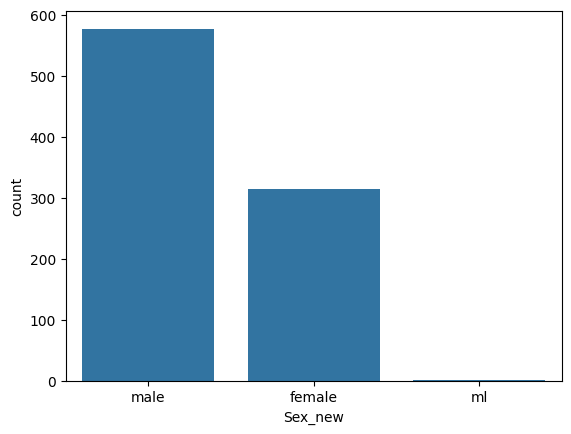

In [42]:
sns.countplot(x='Sex_new',data=df_titanic)

In [43]:
df_titanic['Sex_new'].value_counts()

Sex_new
male      577
female    314
ml          1
Name: count, dtype: int64

In [44]:
# lets manually change the NaN and ml to male 
df_titanic['Sex_new']=df_titanic['Sex_new'].map({'female':"female","male":"male","ml":"male","NaN":"male"})

<Axes: xlabel='Sex_new', ylabel='count'>

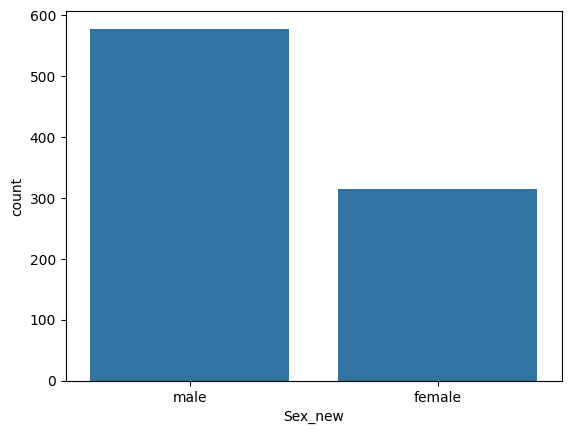

In [45]:
sns.countplot(x='Sex_new',data=df_titanic)

# Handling Missing Values

### The real world data often has a lot of missing values.there are many reasons for occurrences of these missing values 

* The most common reason is Data Collection to have missing values in dataset.

### Why it is important ot handle missing values?
* Missing data in the training dataset lead reduce in accuracy of the model
* it can lead to biased model
* it can lead to wrong classification or prediction
* it is important to consider thar the imputation of missing value should be the first step in any processing sequence
* imputing qualitative predictors prior to creating final variable for modeling so that the binary nature of the resulting imputation can be preserved
* if feature Scaling is performed on the data prior to imputation ,the resulting means and standard deviations will inherit the potential biases. 

### Missing value treatment 
* removal or deletion of missing values
* impute missing values with Statistical way(Mean/Median/Mode)
* prediction Model(Regression/Classification)
* Use Sklearn Impute module (SimpleImputer,Iterativeimputer,KNNImputer)
* Imputation using Deep Learning Libary-Datawig

##### python functions used to impute the missing values in dataset.
* use pythin fillna function
* use Interpolation method
* use python replace function

# Data Cleaning

* Requeried when there is missing content. as the ml models and deep learning models don't work.

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
dataset=pd.read_csv('loan.csv')
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [48]:
dataset.shape

(614, 13)

In [49]:
# number of null values
dataset.isnull().sum()  # gives the total number of rows with null value

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [50]:
# percentage of null values per column wise
(dataset.isnull().sum()/dataset.shape[0])*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [51]:
# finding the null values present in the dataset
(dataset.isnull().sum().sum()/(dataset.shape[0]))*100

24.267100977198698

In [52]:
# To find not null values in the dataset
dataset.notnull().sum()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

<Axes: >

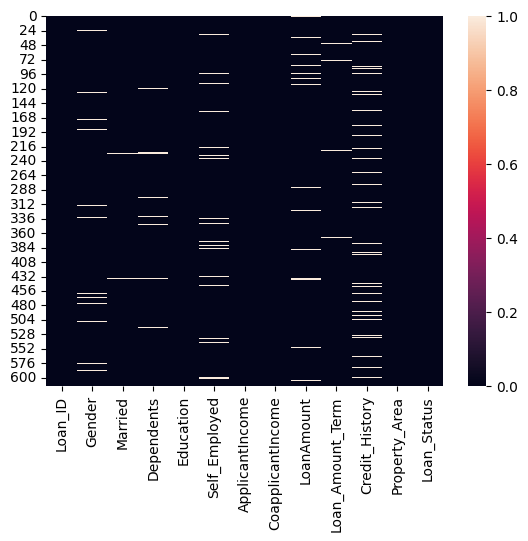

In [53]:
# graphical representation of null values
fig = plt.figure()
fig.patch.set_facecolor('white')
sns.heatmap(dataset.isnull())

* if the dataset has more than `50%` null values then don't use that dataset
* if the columns has more than `50%` null values then drop that columns

## Ways to delete null values 

* delete the entire column is there many null values `OR`
* delete only the rows with null values

In [54]:
dataset.drop(columns=['Credit_History'],inplace=True)

In [55]:
dataset.dropna(inplace=True)

<Axes: >

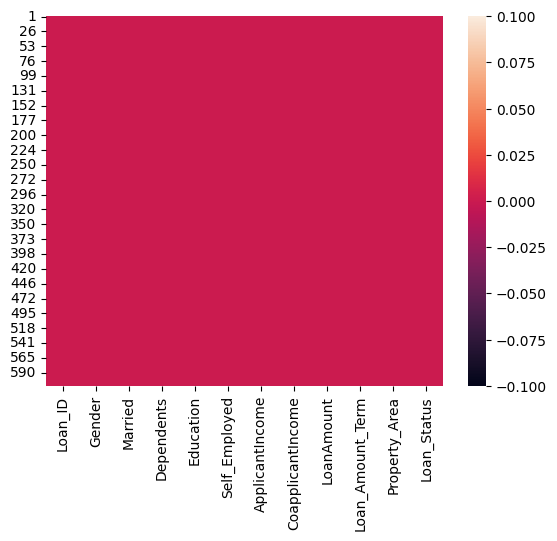

In [56]:
sns.heatmap(dataset.isnull())

percentage of data lost:

 -> original number of rows=614
 
 -> number of rows after removing null valure rows = 523

In [57]:
((614-523)/614)*100

14.82084690553746

## Handling missing values (imputing category data)

In [1]:
import pandas as pd 
import seaborn as sns

In [2]:
dataset=pd.read_csv('loan.csv')
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
# filling the null values.
# not correct just Example
dataset.fillna(10) 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,10.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### Forward filling 
fill the NaN value with the previous value in the dataframe 

#### Backward filling 
fill the NaN value with the next value in the dataframe

In [6]:
# deault axis is `0` along the Rows.
# if the axis is `1` along the columns.
d1=dataset.fillna(method="bfill",axis=1)
d1.head(3)

C:\Users\91835\AppData\Local\Temp\ipykernel_15564\2596190818.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  d1=dataset.fillna(method="bfill",axis=1)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,360.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [7]:
# deault axis is `0` along the Rows.
# if the axis is `1` along the columns.
d2=dataset.fillna(method="ffill",axis=1)
d2.head(3)

C:\Users\91835\AppData\Local\Temp\ipykernel_15564\1394739363.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  d2=dataset.fillna(method="ffill",axis=1)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


#### Categorical data filling

In [65]:
dataset['Gender'].mode()[0]

'Male'

In [66]:
dataset['Gender'].fillna(dataset['Gender'].mode()[0],inplace=True)

In [67]:
dataset.select_dtypes(include="object").isnull().sum()

Loan_ID           0
Gender            0
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

In [68]:
# remove the null values of all columns using the mode
for i in dataset.select_dtypes(include="object").columns:
    dataset[i].fillna(dataset[i].mode()[0],inplace=True)

In [69]:
dataset.select_dtypes(include="object").isnull().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [70]:
dataset.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Handling Missing values using Scikit-learn

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
dataset=pd.read_csv("loan.csv")
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [73]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [74]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [75]:
dataset.select_dtypes(include='float').columns

Index(['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History'],
      dtype='object')

In [76]:
from sklearn.impute import SimpleImputer

In [77]:
si=SimpleImputer(strategy="mean") 
ar=si.fit_transform(dataset[['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
                         'Credit_History']])

In [78]:
new_dataset=pd.DataFrame(ar,columns=dataset.select_dtypes("float").columns)

In [79]:
new_dataset.isnull().sum()

CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

# One Hot encoding and Dummy variables 

In [8]:
import pandas as pd

In [9]:
dataset=pd.read_csv('loan.csv')
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [10]:
dataset['Gender'].fillna(dataset['Gender'].mode()[0],inplace=True)

In [11]:
dataset['Married'].fillna(dataset['Married'].mode()[0],inplace=True)

#### Ways to perform one hot encoding 
* get dummies in pandas
* scikit learn one hot encoder class.

In [12]:
en_data=dataset[["Gender","Married"]]
new_en=pd.get_dummies(en_data)
new_en.replace({"True":1,
               "False":0},inplace=True)
new_en

,Gender_Female,Gender_Male,Married_No,Married_Yes
0,False,True,True,False
1,False,True,False,True
2,False,True,False,True
3,False,True,False,True
4,False,True,True,False
...,...,...,...,...
609,True,False,True,False
610,False,True,False,True
611,False,True,False,True
612,False,True,False,True


In [13]:
from sklearn.preprocessing import OneHotEncoder

In [14]:
ohe=OneHotEncoder()

In [19]:
arr=ohe.fit_transform(en_data).toarray()

In [20]:
pd.DataFrame(arr,columns=['Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes'])
# this increase the number of columns.

,Gender_Female,Gender_Male,Married_No,Married_Yes
0,0.0,1.0,1.0,0.0
1,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,1.0
4,0.0,1.0,1.0,0.0
...,...,...,...,...
609,1.0,0.0,1.0,0.0
610,0.0,1.0,0.0,1.0
611,0.0,1.0,0.0,1.0
612,0.0,1.0,0.0,1.0


In [89]:
# to have less number of columns 
# this method cause the first column to be dropped
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop="first")
arr=ohe.fit_transform(en_data).toarray()
pd.DataFrame(arr,columns=['Gender_Male','Married_Yes'])

,Gender_Male,Married_Yes
0,1.0,0.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,0.0
...,...,...
609,0.0,0.0
610,1.0,1.0
611,1.0,1.0
612,1.0,1.0


# Label Encoding 

Label encoding is a data preprocessing technique that converts categorical variables into numerical values so that machine learning models can use them. This is important because most machine learning algorithms only work with numerical data

nominal data :- NO connection between the data
eg dog,cow,parrot,cat 
- all come in category of animal
- but don't have a connection between them. 

In [90]:
import pandas as pd

In [91]:
df=pd.DataFrame({
    "name":["wscube","cow","cat","dog","black"]
})
df

,name
0,wscube
1,cow
2,cat
3,dog
4,black


In [92]:
from sklearn.preprocessing import LabelEncoder

In [93]:
le=LabelEncoder()
df["en_name"]=le.fit_transform(df["name"])

In [94]:
df

,name,en_name
0,wscube,4
1,cow,2
2,cat,1
3,dog,3
4,black,0


In [95]:
# bigger dataset
dataset=pd.read_csv('loan.csv')
la=LabelEncoder()
dataset["en_propert_Area"]=la.fit_transform(dataset["Property_Area"])

In [96]:
dataset["en_propert_Area"].unique()

array([2, 0, 1])

# Oridinal Encoding 
oridinal data - data which have relation among them 

Ways to perform Ordinal Encoding
- Scikit learn
- map function

In [97]:
# using sklearn
df=pd.DataFrame({
    "Size":["s","m","l","xl","s","m","l","s","s","l","xl","m"]
})
df.head(3)

,Size
0,s
1,m
2,l


In [98]:
ord_data=[["s","m","l","xl"]]
from sklearn.preprocessing import OrdinalEncoder

In [99]:
oe=OrdinalEncoder(categories=ord_data)
# for categories=`auto` - Alphatical order 
df["Size_en"]=oe.fit_transform(df[["Size"]])

In [100]:
df

,Size,Size_en
0,s,0.0
1,m,1.0
2,l,2.0
3,xl,3.0
4,s,0.0
5,m,1.0
6,l,2.0
7,s,0.0
8,s,0.0
9,l,2.0


In [101]:
# using map function
ord_data1={
    "s":0,
    "m":1,
    "l":2,
    "xl":3
}
df["Size_en_map"]=df["Size"].map(ord_data1)

In [102]:
df

,Size,Size_en,Size_en_map
0,s,0.0,0
1,m,1.0,1
2,l,2.0,2
3,xl,3.0,3
4,s,0.0,0
5,m,1.0,1
6,l,2.0,2
7,s,0.0,0
8,s,0.0,0
9,l,2.0,2


In [103]:
# bigger dataset
dataset=pd.read_csv('loan.csv')
dataset['Property_Area'].fillna(dataset["Property_Area"].mode()[0],inplace=True)

In [104]:
from sklearn.preprocessing import OrdinalEncoder

In [105]:
dataset['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [106]:
en_data=[['Urban', 'Rural', 'Semiurban']]
oe1=OrdinalEncoder(categories=en_data)

In [107]:
arr=oe1.fit_transform(dataset[['Property_Area']])

In [108]:
dataset['en_Property_Area']=arr

In [109]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,en_Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,1.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,1.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,0.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0.0


In [110]:
# using 
en_data1={
    "Urban":0,
    "Rural":1,
    "Semiurban":2
}
dataset['en_Propert_Area_by_map']=dataset['Property_Area'].map(en_data1)

In [111]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,en_Property_Area,en_Propert_Area_by_map
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.0,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1.0,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0.0,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.0,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,1.0,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,1.0,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,0.0,0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0.0,0


# Outliers

* generally the dataset of certain category is in a range of value (like:0-100)
but some values are outside this range in our values.
* An outlier is a data point that is noticeably different from the rest. They represent errors in measurement, bad data collection, or simply show variables not considered when collecting the data.

* outliers follow the Guassian distribution curve.

  
<img src="C:\Users\91835\OneDrive\Pictures\Screenshots\Screenshot 2024-06-27 093427.png"></img>

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [113]:
dataset=pd.read_csv('loan.csv')

In [114]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [115]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


We can see in the min and max values of Application and co application, there is a large range gap,also if we compare by the mean there is huge gap between the mean and the max values these are the outliers

<Figure size 10000x1000 with 0 Axes>

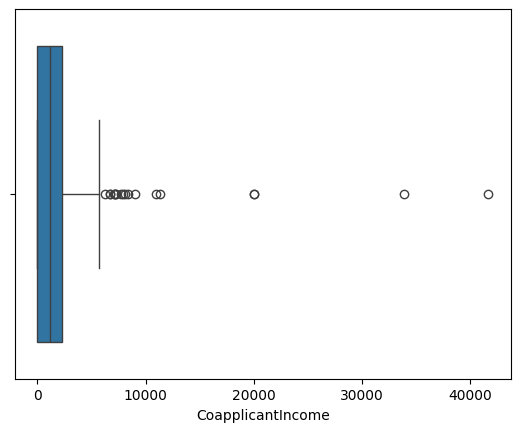

<Figure size 10000x1000 with 0 Axes>

In [116]:
sns.boxplot(x="CoapplicantIncome",data=dataset)
plt.figure(figsize=(100,10))

# the circle are the outliers in the dataset

<Figure size 1000x700 with 0 Axes>

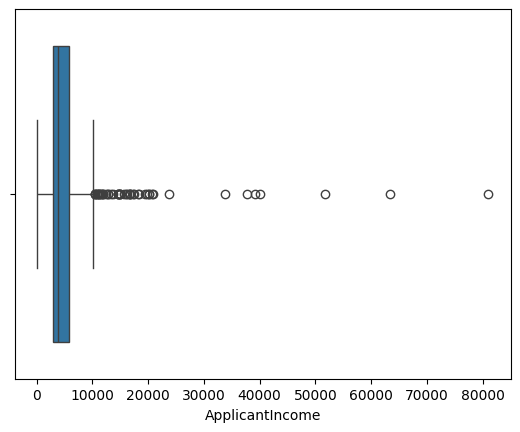

<Figure size 1000x700 with 0 Axes>

In [117]:
sns.boxplot(x="ApplicantIncome",data=dataset)
plt.figure(figsize=(10,7))


C:\Users\91835\AppData\Local\Temp\ipykernel_22612\4216000722.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["ApplicantIncome"],color="r")


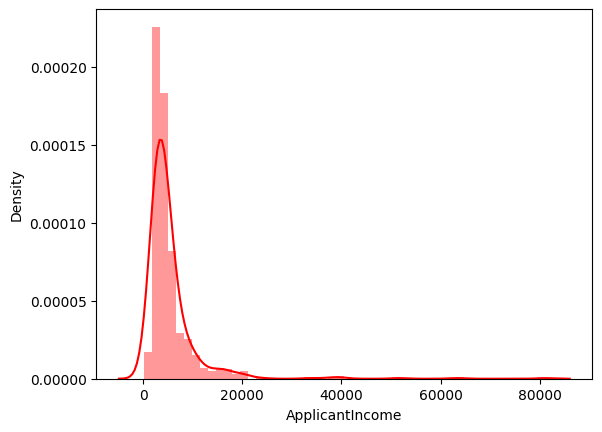

In [118]:
sns.distplot(dataset["ApplicantIncome"],color="r")
plt.show()
# the ending tail (from 20000 to 80000) are thre outliers

## Outlier removal using `IQR`
* IQR-  interquartile range.
* IQR=Q3 - Q1 (Q is the Quartile)
  
min max outliers
* min=Q1-(1.5*IQR)
* max=Q3+(1.5*IQR)

#
* 1st quartile is 25 percentile
* 2nd quartile is 50 percentile
* 3rd quartile is 75 percentile
* 4th quartile is 100 percentile

- The 25th percentile is the value at which 25% of the answers lie below that value, and 75% of the answers lie above that value. 

In [119]:
dataset.shape

(614, 13)

In [120]:
# for coapplicantIncome
q1=dataset["CoapplicantIncome"].quantile(0.25)
q3=dataset["CoapplicantIncome"].quantile(0.75)
q3

2297.25

In [121]:
IQR=q3-q1

In [122]:
max_range=q3+(1.5*IQR)
min_range = q1-(1.5*IQR)

In [123]:
max_range,min_range

(5743.125, -3445.875)

In [124]:
new_dataset=dataset[dataset["CoapplicantIncome"]<=max_range]

In [125]:
new_dataset.shape

(596, 13)

<Axes: xlabel='CoapplicantIncome'>

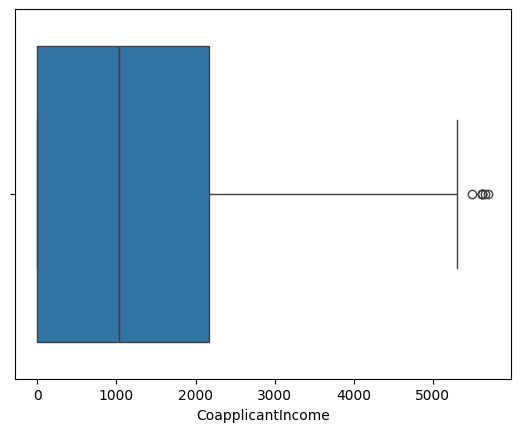

In [126]:
#check that no outliers are there 
sns.boxplot(x='CoapplicantIncome',data=new_dataset)
# very few outliers left can be ignored

In [127]:
# ApplicantIncome
q1=dataset['ApplicantIncome'].quantile(0.25)
q3=dataset['ApplicantIncome'].quantile(0.75)
IQR=q3-q1

In [128]:
min_range=q1-(1.5*IQR)
max_range=q3+(1.5*IQR)
print(min_range,max_range)

-1498.75 10171.25


In [129]:
# As min_range os -ve we don't need to consider that
new_dataset=dataset[dataset["ApplicantIncome"]<=max_range]

In [130]:
new_dataset.shape

(564, 13)

<Axes: xlabel='ApplicantIncome'>

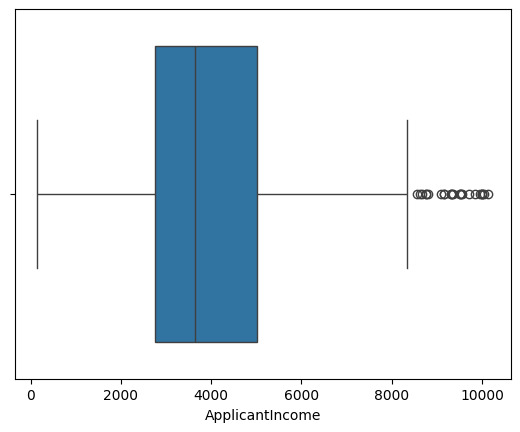

In [131]:
sns.boxplot(x="ApplicantIncome",data=new_dataset)

## Outlier Removing using Z-Score

<img src="C:\Users\91835\OneDrive\Pictures\Screenshots\Screenshot 2024-06-27 145905.png" hegth=300px width=400px></imag>


* The data after the U=3 will be outlier data
* That is z in range -3 to 3
* minimum and maximum range U-3 * S.D. and U+3 * S.D.
#### Z-Score
* Z=(X-U)/S.D.

In [132]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [133]:
# direct way
min_range=dataset["CoapplicantIncome"].mean()-(3*dataset['CoapplicantIncome'].std())
max_range=dataset["CoapplicantIncome"].mean()+(3*dataset['CoapplicantIncome'].std())

In [134]:
min_range,max_range

(-7157.4993096454655, 10399.990905699668)

In [135]:
new_dataset=dataset[dataset["CoapplicantIncome"]<=max_range]

In [136]:
new_dataset.shape

(608, 13)

<Axes: xlabel='CoapplicantIncome'>

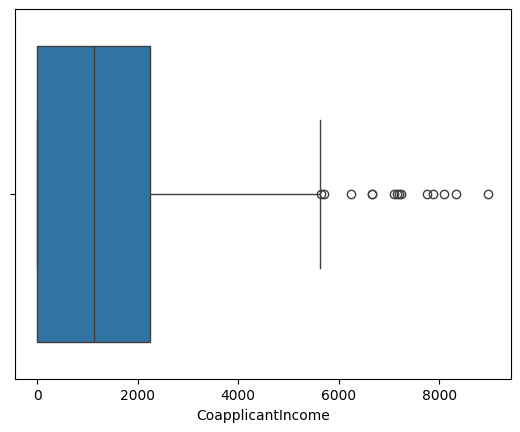

In [137]:
sns.boxplot(x='CoapplicantIncome',data=new_dataset)

In [138]:
# Z-score method
z_score=(dataset['CoapplicantIncome']-dataset["CoapplicantIncome"].mean())/dataset["CoapplicantIncome"].std()

In [139]:
dataset["Z_Score"]=z_score

In [140]:
dataset[dataset["Z_Score"]<3]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Z_Score
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,-0.554036
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.038700
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.554036
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.251774
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,-0.554036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.554036
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.554036
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,-0.472019
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,-0.554036


# Feature Scaling

Feature scaling is the process of normalizing the range of features in a dataset. Real-world datasets often contain features that are varying in degrees of magnitude, range, and units. Therefore, in order for machine learning models to interpret these features on the same scale, we need to perform feature scaling

* nature of data is not changed in feature scaling := ex if you data is following a normal distribution curve so after feature scailing also it will follow normal distribution

* it doesn't affect the outliers.
#### Types of Scaling
* Standardization
* normailzation
    * min max scaling.

## Standardization
it is very effective technique which re-scales a feature value so that it has distribution with 0 mean value and variance equals to 1.
<img src="C:\Users\91835\OneDrive\Pictures\featrure scaling.png" height=300px width=400px></img>

In [141]:
import pandas as pd 
dataset=pd.read_csv('loan.csv')

In [142]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

C:\Users\91835\AppData\Local\Temp\ipykernel_22612\2264481338.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["ApplicantIncome"])


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

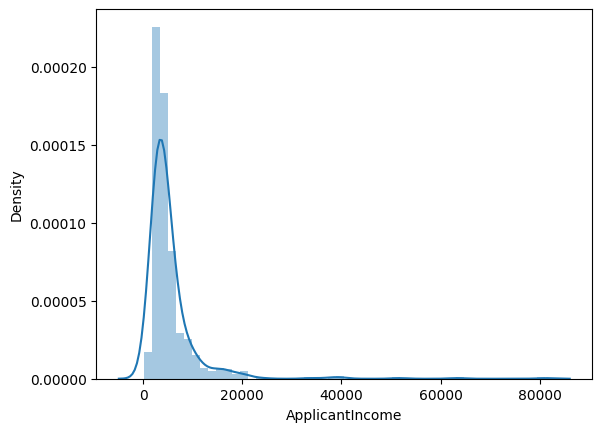

In [143]:
sns.distplot(dataset["ApplicantIncome"])

In [144]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [145]:
from sklearn.preprocessing import StandardScaler

In [146]:
ss=StandardScaler()
dataset["ApplicantIncome_ss"]=ss.fit_transform(dataset[["ApplicantIncome"]])

In [147]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_ss
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072991
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134412
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.393747
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.462062
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.097728


In [148]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_ss
count,614.000000,614.000000,592.000000,600.00000,564.000000,6.140000e+02
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,-4.339634e-18
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,1.000815e+00
min,150.000000,0.000000,9.000000,12.00000,0.000000,-8.606493e-01
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,-4.138159e-01
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,-2.606393e-01
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,6.414426e-02
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.238462e+01


C:\Users\91835\AppData\Local\Temp\ipykernel_22612\3490596589.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["ApplicantIncome_ss"])
C:\Users\91835\AppData\Local\Temp\ipykernel_22612\3490596589.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["ApplicantIncome"])


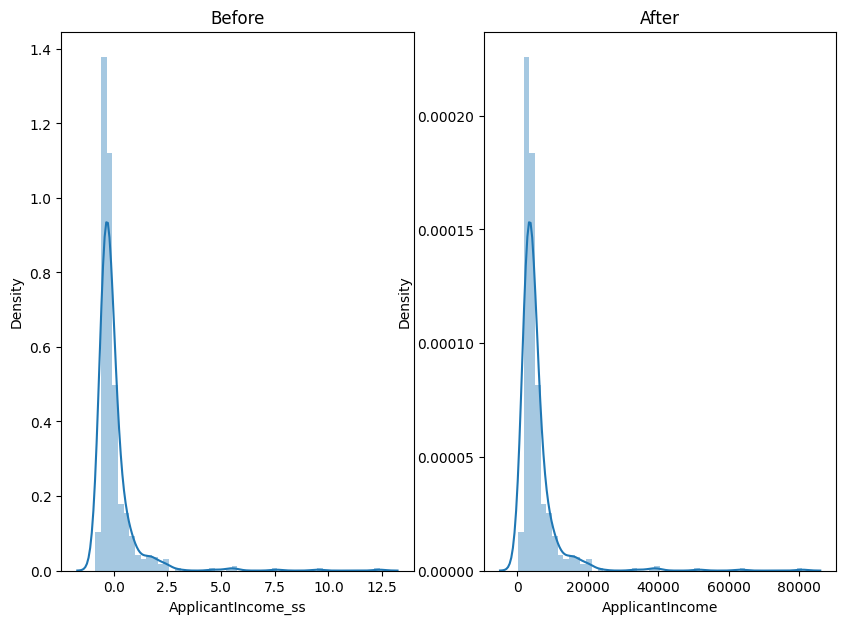

In [149]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset["ApplicantIncome_ss"])
plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset["ApplicantIncome"])
plt.show()
# nature of graph remains same but the range changes

## Normalization (Min-Max Scaler)
* MinMaxScaler scales the data so that it is in the range of [0, 1] i.e. the minimum is '0' and maximum is '1'.

<img src="C:\Users\91835\OneDrive\Pictures\Screenshots\Screenshot 2024-06-27 191523.png" heigh=300px width=400px></img>

In [150]:
from sklearn.preprocessing import MinMaxScaler

In [151]:
mm=MinMaxScaler()

In [152]:
dataset=pd.read_csv('loan.csv')

In [153]:
dataset["ApplicantIncome_mm"]=mm.fit_transform(dataset[["ApplicantIncome"]])

In [154]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_mm
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.064978
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.075560
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.033735
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,0.045300
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,0.069821
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


C:\Users\91835\AppData\Local\Temp\ipykernel_22612\3042619922.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["ApplicantIncome_mm"])
C:\Users\91835\AppData\Local\Temp\ipykernel_22612\3042619922.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["ApplicantIncome"])


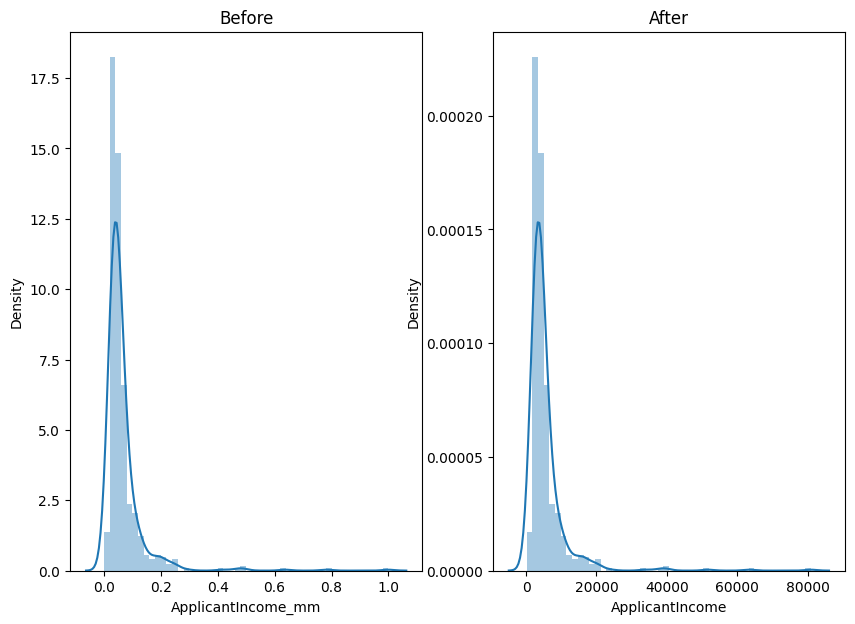

In [155]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset["ApplicantIncome_mm"])
plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset["ApplicantIncome"])
plt.show()
# nature of graph remains same but the range changes

# Replace data and change data types

In [156]:
dataset=pd.read_csv('loan.csv')

In [157]:
dataset['Dependents'].value_counts()
# we have to remove 3+ and replace it with 3 as 3+ is not correct 

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [158]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [159]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [160]:
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0],inplace=True)

In [161]:
dataset['Dependents'].replace("3+",3,inplace=True)

In [162]:
dataset['Dependents'].value_counts()

Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64

In [168]:
dataset['Dependents']=dataset['Dependents'].astype("float32")

In [169]:
dataset['Dependents'].dtype

dtype('float32')

# Column Transformer

column transformer -> helps you work with numerical and categorical data separately. It allows you to create and apply different transformations to specific columns of your data. This can simplify your workflow by combining multiple feature extraction or transformation methods into a single transformer.

<img src="C:\Users\91835\OneDrive\Pictures\Screenshots\Screenshot 2024-06-27 215314.png"></img>

in our dataset we have different type of data for every data we have to perform 
- Simple imputation or,
- One hot Encoding or,
- Ordinal Encoding
  
and out of all that data make a numpy array and then dataset instead of performing so many computations we can do it with help of just column transformer.

In [47]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

In [48]:
df=pd.read_csv('covid_toy.csv')
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [49]:
df['city'].value_counts()

city
Kolkata      32
Bangalore    30
Delhi        22
Mumbai       16
Name: count, dtype: int64

In [50]:
df.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

In [51]:
# gender,city - one hot encoder
# fever - simple imputer
# cough - ordinal encoder

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns='has_covid'),df['has_covid'],test_size=0.2)

## 1.Aam Zindagi
WITHOUT USING COLUMN TRANSFORMATION


In [53]:
# adding simple imputer to fever.
si=SimpleImputer(strategy='mean')
X_train_fever=si.fit_transform(X_train[['fever']])
X_test_fever=si.fit_transform(X_test[['fever']])
X_train_fever.shape

(80, 1)

In [54]:
# Ordinal Encoding -> cough
oe=OrdinalEncoder()
X_train_cough=oe.fit_transform(X_train[['cough']])
X_test_cough=oe.fit_transform(X_test[['cough']])
X_train_cough.shape

(80, 1)

In [55]:
# One hot encoding -> gender,city
from sklearn.preprocessing import OneHotEncoder

In [84]:
ohe=OneHotEncoder(drop='first',sparse_output=False) # sparse output false is use 
# so that the rows are not compressed as it cannot be used in compressed format
X_train_gender=ohe.fit_transform(X_train[['gender']])
X_test_gender=ohe.fit_transform(X_test[['gender']])

X_train_city=ohe.fit_transform(X_train[['city']])
X_test_city=ohe.fit_transform(X_test[['city']])
X_train_city.shape,X_train_gender.shape

((80, 3), (80, 1))

In [85]:
X_train_age=X_train[['age']].values
X_test_age=X_test[['age']].values

In [86]:
X_train_age.shape,X_test_age.shape

((80, 1), (20, 1))

In [87]:
X_train_transformed=np.concatenate((X_train_age,X_train_fever,X_train_gender,X_train_city,X_train_cough),axis=1)
X_test_transformed=np.concatenate((X_test_age,X_test_fever,X_test_gender,X_test))

In [78]:
X_train_transformed.shape

(80, 7)

## 2.Mentos Zindagi

In [88]:
from sklearn.compose import ColumnTransformer

In [94]:
transformer=ColumnTransformer(transformers=[
    ('tnf1',SimpleImputer(),['fever']),
    ('tnf2',OrdinalEncoder(categories=[['Mild','Strong']]),['cough']),
    ('tnf3',OneHotEncoder(drop='first',sparse_output=False),['gender','city'])
],remainder='passthrough')
# remainder:= for the remaining columns 
# can be drop ie remove the remaing cols or passthrough leave as it is 

In [95]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('tnf1', SimpleImputer(), ['fever']),
                                ('tnf2',
                                 OrdinalEncoder(categories=[['Mild',
                                                             'Strong']]),
                                 ['cough']),
                                ('tnf3',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['gender', 'city'])])

In [101]:
transformer.fit_transform(X_train).shape,
transformer.fit_transform(X_test).shape

(20, 7)